In [25]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt # 可视化模块

# create some data
X = np.linspace(-1, 1, 200)

np.random.shuffle(X)    # randomize the data

Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))

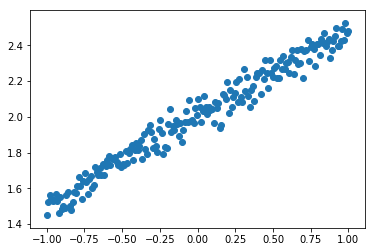

In [26]:
# plot data
plt.scatter(X, Y)
plt.show()

X_train, Y_train = X[:160], Y[:160]     # train 前 160 data points
X_test, Y_test = X[160:], Y[160:]       # test 后 40 data points

## 1. build model

In [29]:
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1))

/Users/blair/.pyenv/versions/keras/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  


## 2. compile model

In [30]:
# choose loss function and optimizing method
model.compile(loss='mse', optimizer='sgd')

## 3. train model

In [31]:
# training
print('Training -----------')
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost: ', cost)

"""
Training -----------
train cost:  4.111329555511475
train cost:  0.08777070790529251
train cost:  0.007415373809635639
train cost:  0.003544030711054802
"""

Training -----------


W0821 16:40:18.174602 4598883776 deprecation_wrapper.py:119] From /Users/blair/.pyenv/versions/keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0821 16:40:18.186400 4598883776 deprecation_wrapper.py:119] From /Users/blair/.pyenv/versions/keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



train cost:  5.5109124
train cost:  0.4963232
train cost:  0.112195596
train cost:  0.030195188


'\nTraining -----------\ntrain cost:  4.111329555511475\ntrain cost:  0.08777070790529251\ntrain cost:  0.007415373809635639\ntrain cost:  0.003544030711054802\n'

## 4. evaluate model

In [32]:
# test
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)

"""
Testing ------------
40/40 [==============================] - 0s
test cost: 0.004269329831
Weights= [[ 0.54246825]] 
biases= [ 2.00056005]
"""


Testing ------------
40/40 [==============================] - 0s 494us/step
test cost: 0.02692597731947899
Weights= [[0.20930433]] 
biases= [1.9935403]


'\nTesting ------------\n40/40 [==============================] - 0s\ntest cost: 0.004269329831\nWeights= [[ 0.54246825]] \nbiases= [ 2.00056005]\n'

## 5. 可视化结果

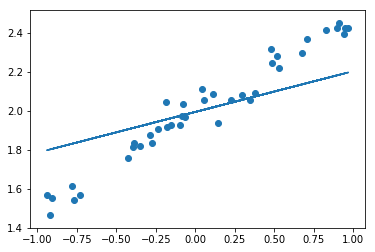

In [36]:
# plotting the prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()
